# Unsupervised Learning Algorithms

Objective: In this tutorial, we will explore popular unsupervised learning algorithms and understand their applications and implementations using scikit-learn.

Duration: Approximately 1 hours

## **Principal Component Analysis (PCA)**

**a. Introducing PCA (Principal Component Analysis):**

PCA, short for Principal Component Analysis, is a popular dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while preserving the most important information. It achieves this by finding the principal components, which are new orthogonal axes that capture the maximum variance in the data.

**b. How PCA Works and Its Applications:**

1. **Finding Principal Components:** PCA finds the first principal component (PC1) by identifying the direction along which the data has the highest variance. The second principal component (PC2) is orthogonal to PC1 and captures the second highest variance. The process continues until the desired number of principal components is obtained.

2. **Dimensionality Reduction:** Once the principal components are identified, PCA projects the original data onto these components to create a lower-dimensional representation of the data.

3. **Applications:** PCA is widely used for various purposes, including:
   - Reducing the dimensionality of data to improve computational efficiency.
   - Visualizing high-dimensional data in a lower-dimensional space.
   - Removing noise and redundant features from data.
   - Preprocessing data before applying other machine learning algorithms.

**c. Implementation using scikit-learn:**

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Apply PCA with 2 principal components
pca = PCA(n_components=2)

# Fit the model to the data and transform the data to the lower-dimensional space
X_pca = pca.fit_transform(X)

# Visualize the data in the lower-dimensional space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Iris Dataset')
plt.show()
```

In this example, we use the Iris dataset from scikit-learn, which has four features (dimensions). We apply PCA with `n_components=2` to reduce the dimensionality to two principal components. We then fit the model to the data and transform the data into the lower-dimensional space using `fit_transform()`. Finally, we visualize the data points in the new lower-dimensional space using a scatter plot, where the colors represent different classes of iris flowers. PCA helps to visualize the data in a two-dimensional space, capturing most of the variance and allowing for easier data exploration and visualization.

### Dimensionality reduction

As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it.
Recall that the Iris data is four dimensional: there are four features recorded for each sample.

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data.
Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use principal component analysis (PCA; see [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb)), which is a fast linear dimensionality reduction technique.
We will ask the model to return two components—that is, a two-dimensional representation of the data.

Following the sequence of steps outlined earlier, we have:

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [3]:
y_iris = iris['species']
y_iris.shape

(150,)

In [4]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

In [5]:
print(X_2D)

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

Now let's plot the results. A quick way to do this is to insert the results into the original Iris ``DataFrame``, and use Seaborn's ``lmplot`` to show the results:

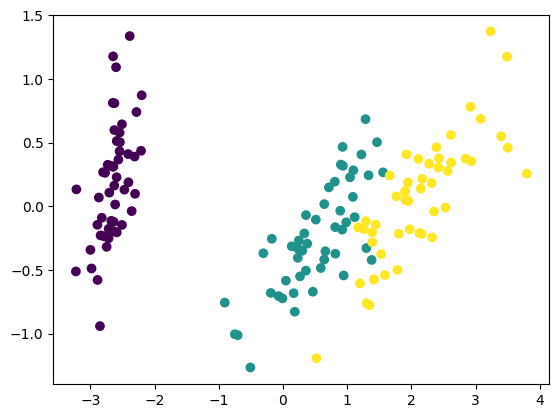

In [6]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
plt.scatter(iris.PCA1, iris.PCA2, c=iris.species.astype('category').cat.codes);

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels!
This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

## **K-Means Clustering**

**a. Introducing k-means Clustering:**

k-means clustering is a popular unsupervised learning algorithm used for partitioning data into k clusters based on similarity. It is widely used for clustering tasks in various fields such as image segmentation, customer segmentation, and data compression.

**b. How the k-means Algorithm Works:**

The k-means algorithm works as follows:

1. **Initialization:** Choose k initial cluster centroids randomly from the data points.

2. **Assignment:** Assign each data point to the nearest cluster centroid based on the Euclidean distance.

3. **Update:** Update the cluster centroids by taking the mean of the data points assigned to each cluster.

4. **Reassignment:** Reassign data points to the nearest cluster centroid based on the updated centroids.

5. **Repeat:** Repeat steps 3 and 4 until the centroids no longer change significantly, or a fixed number of iterations is reached.

**c. Implementation using scikit-learn:**

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Create sample data
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Create a KMeans instance with k=3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the data points and cluster centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('k-means Clustering')
plt.show()
```

In this example, we create sample data using `make_blobs` from scikit-learn with 3 clusters. We then use the `KMeans` class from scikit-learn to create a k-means clustering model with `n_clusters=3` (indicating we want 3 clusters). We fit the model to the data using `fit()` and obtain the cluster centroids and labels using `cluster_centers_` and `labels_`, respectively. Finally, we visualize the data points and cluster centroids using a scatter plot. The points are colored based on their cluster assignments, and the cluster centroids are marked with red 'x' symbols.

### Iris Clustering

Let's next look at applying clustering to the Iris data.
A clustering algorithm attempts to find distinct groups of data without reference to any labels.
Here we will use a powerful clustering method called a Gaussian mixture model (GMM), discussed in more detail in [In Depth: Gaussian Mixture Models](05.12-Gaussian-Mixtures.ipynb).
A GMM attempts to model the data as a collection of Gaussian blobs.

We can fit the Gaussian mixture model as follows:

In [7]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

As before, we will add the cluster label to the Iris ``DataFrame`` and plot the results:

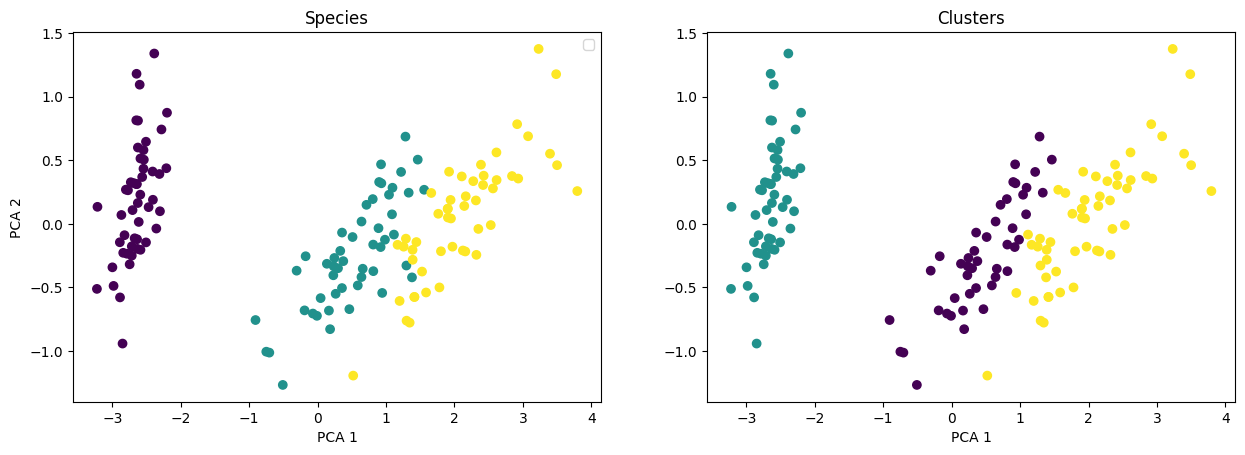

In [8]:
iris['cluster'] = y_gmm

fig = plt.figure()
fig.set_figwidth(15)

plt.subplot(1,2,1)
plt.title("Species")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.scatter(iris.PCA1, iris.PCA2, c = iris.species.astype('category').cat.codes)
plt.legend()

plt.subplot(1,2,2)
plt.title("Clusters")
plt.xlabel("PCA 1")
plt.scatter(iris.PCA1, iris.PCA2, c= iris.cluster)

plt.show()

By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying label: the *setosa* species is separated perfectly within cluster 0, while there remains a small amount of mixing between *versicolor* and *virginica*.
This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could *automatically* identify the presence of these different groups of species with a simple clustering algorithm!
This sort of algorithm might further give experts in the field clues as to the relationship between the samples they are observing.

## **Model Evaluation for Unsupervised Learning**

**a. Evaluation Metrics for Unsupervised Learning:**

Evaluating the performance of unsupervised learning algorithms can be challenging since there are no ground truth labels to compare the predictions against. However, there are several evaluation metrics that can provide insights into the quality of clustering results. Some commonly used metrics include:

1. **Silhouette Score:** The silhouette score measures how well-defined the clusters are. It computes the average silhouette coefficient for each sample, where a higher score indicates that the sample is well-clustered, and a lower score indicates that it might be assigned to the wrong cluster or is too close to neighboring clusters.

2. **Inertia:** Inertia, also known as within-cluster sum of squares, measures how tightly the samples are clustered around the centroids. Lower inertia values indicate better-defined and more compact clusters.

3. **Davies-Bouldin Index:** The Davies-Bouldin index measures the average similarity between each cluster and its most similar cluster, considering both the cluster's scatter and separation. Smaller values indicate better-defined clusters.

4. **Calinski-Harabasz Index (Variance Ratio Criterion):** The Calinski-Harabasz index computes the ratio of the sum of between-cluster dispersion to within-cluster dispersion. Higher values indicate better-defined and well-separated clusters.

It's important to note that these metrics are heuristic and should be used in conjunction with domain knowledge and visual inspection to assess the quality of clustering results.

**b. Techniques to Visualize Clustering Results:**

Visualization is an essential aspect of understanding and interpreting clustering results. Here are some techniques to visualize clustering outcomes:

1. **Scatter Plot:** Use scatter plots to visualize data points in a 2D space, with different colors representing different clusters.

2. **Cluster Centers:** For algorithms like k-means, visualize the cluster centers (centroids) in the scatter plot to see how the clusters are distributed.

3. **Heatmaps:** Use heatmaps to display the density of points within each cluster, especially useful for hierarchical clustering.

4. **Dendrogram:** For hierarchical clustering, plot a dendrogram to visualize the hierarchical structure of the clusters.

5. **Dimensionality Reduction:** Apply dimensionality reduction techniques like PCA or t-SNE to visualize high-dimensional data in a lower-dimensional space while preserving cluster structures.

6. **Interactivity:** Use interactive tools like Plotly or Bokeh to explore clusters and data points dynamically.

7. **Cluster Overlays:** Overlay clustering results on other relevant visualizations, such as geographical maps or network graphs, to gain additional insights.

Remember that visualization is subjective, and the choice of technique depends on the nature of the data and the insights you want to obtain. Visualization can help identify potential issues like overlapping clusters or outliers, which can be valuable in refining clustering algorithms and validating results.

## Application: Exploring Hand-written Digits

To demonstrate these principles on a more interesting problem, let's consider one piece of the optical character recognition problem: the identification of hand-written digits.
In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use Scikit-Learn's set of pre-formatted digits, which is built into the library.

### Loading and visualizing the digits data

We'll use Scikit-Learn's data access interface and take a look at this data:

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels.
Let's visualize the first hundred of these:

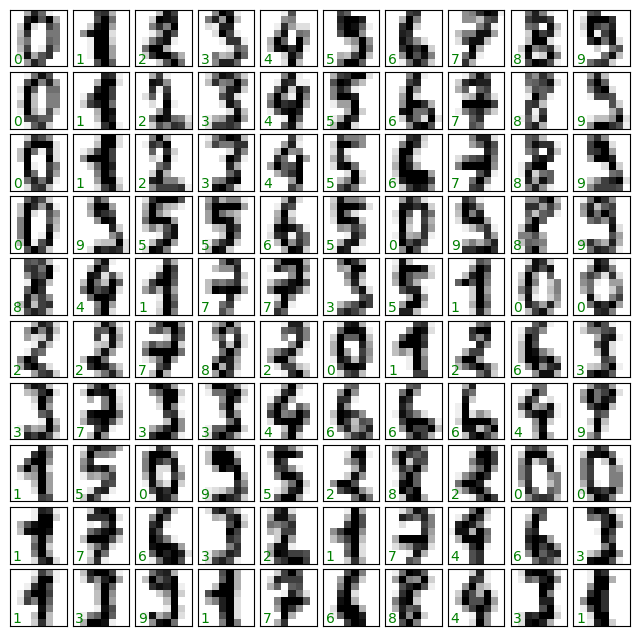

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In order to work with this data within Scikit-Learn, we need a two-dimensional, ``[n_samples, n_features]`` representation.
We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit.
Additionally, we need the target array, which gives the previously determined label for each digit.
These two quantities are built into the digits dataset under the ``data`` and ``target`` attributes, respectively:

In [11]:
X = digits.data
X.shape

(1797, 64)

In [12]:
y = digits.target
y.shape

(1797,)

We see here that there are 1,797 samples and 64 features.

### Unsupervised learning: Dimensionality reduction

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to effectively visualize points in such a high-dimensional space.
Instead we'll reduce the dimensions to 2, using an unsupervised method.
Here, we'll make use of a manifold learning algorithm called *Isomap* (see [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb)), and transform the data to two dimensions:

In [13]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

We see that the projected data is now two-dimensional.
Let's plot this data to see if we can learn anything from its structure:

<ipython-input-14-3c1379da21aa>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral_r', 10))


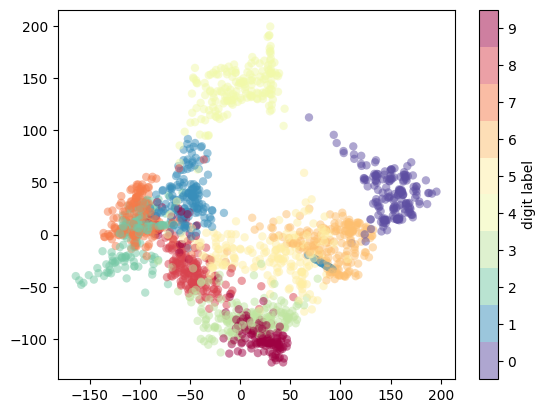

In [14]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral_r', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space. For example, zeros (in purple) and ones (in blue) have very little overlap in parameter space.
Intuitively, this makes sense: a zero is empty in the middle of the image, while a one will generally have ink in the middle.
On the other hand, there seems to be a more or less continuous spectrum between ones and fours: we can understand this by realizing that some people draw ones with "hats" on them, which cause them to look similar to fours.

Overall, however, the different groups appear to be fairly well separated in the parameter space: this tells us that even a very straightforward supervised classification algorithm should perform suitably on this data.
Let's give it a try.

### Classification on digits

Let's apply a classification algorithm to the digits.
As with the Iris data previously, we will split the data into a training and testing set, and fit a Gaussian naive Bayes model:

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now that we have predicted our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

With even this extremely simple model, we find about 80% accuracy for classification of the digits!
However, this single number doesn't tell us *where* we've gone wrong—one nice way to do this is to use the *confusion matrix*, which we can compute with Scikit-Learn and plot with Seaborn:

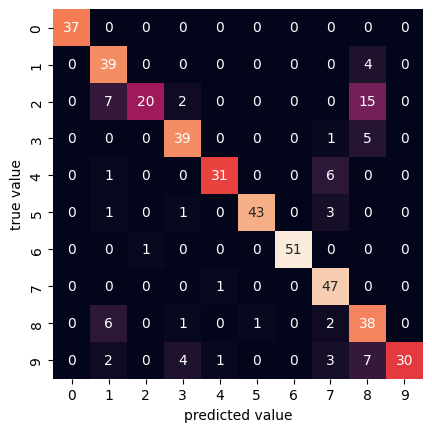

In [18]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights.
Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels.
We'll use green for correct labels, and red for incorrect labels:

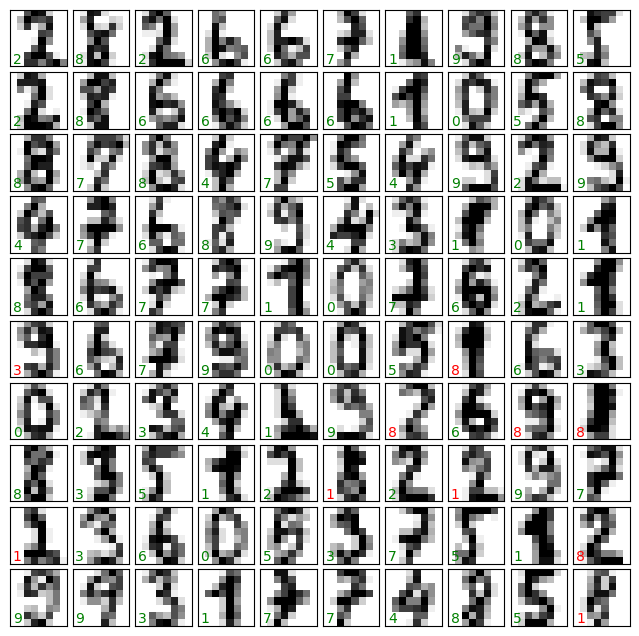

In [19]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Examining this subset of the data, we can gain insight regarding where the algorithm might be not performing optimally.
To go beyond our 80% classification rate, we might move to a more sophisticated algorithm such as support vector machines (see [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)), random forests (see [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb)) or another classification approach.

## **Practice Exercises**

**Exercise 1: K-Means Clustering**

a. Load the Iris dataset from scikit-learn.
b. Apply k-means clustering with k=3 to the dataset.
c. Visualize the clustered data points along with the cluster centroids.

**Exercise 2: Hierarchical Clustering**

a. Generate a synthetic dataset using `make_blobs` with 5 clusters.
b. Apply hierarchical clustering with complete linkage to the dataset.
c. Visualize the clustered data points using a scatter plot.

**Exercise 3: PCA and Visualization**

a. Load the Iris dataset from scikit-learn.
b. Apply PCA to reduce the dimensionality to 2 principal components.
c. Visualize the data points in the lower-dimensional space, colored based on their original classes.

**Exercise 4: Evaluating Clustering**

a. Generate a synthetic dataset using `make_blobs` with 4 clusters.
b. Apply k-means clustering with k=4 to the dataset.
c. Use the silhouette score to evaluate the clustering performance.

**Exercise 5: Density-Based Clustering**

a. Generate a synthetic dataset using `make_moons`.
b. Apply density-based clustering (DBSCAN) to the dataset.
c. Visualize the clustered data points using a scatter plot.

**Exercise 6: Visualizing Hierarchical Clustering**

a. Generate a synthetic dataset using `make_circles`.
b. Apply hierarchical clustering with single linkage to the dataset.
c. Visualize the dendrogram to understand the hierarchical structure.

**Exercise 7: Dimensionality Reduction and Visualization**

a. Load the Wine dataset from scikit-learn.
b. Apply t-SNE to reduce the dimensionality to 2 components.
c. Visualize the data points in the lower-dimensional space, colored based on their target classes.

**Exercise 8: Unsupervised Anomaly Detection**

a. Generate a synthetic dataset with normal and anomaly points.
b. Apply isolation forest or one-class SVM to detect anomalies.
c. Visualize the results, highlighting the detected anomalies.

## **Recap and Q&A**